In [1]:
#pip install selenium

In [2]:
#pip install webdriver_manager

In [3]:
#Importiamo le librerie necessarie

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.wait import WebDriverWait

import csv
import time
from datetime import datetime

In [4]:
# Apriamo il browser e istanziamo la sessione di connessione tra selenium e il web. 
# Poi recuperiamo le informazioni dal sito web in questione
browser = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser.maximize_window()
browser.get('https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html')

In [5]:
window_before = browser.window_handles[0] #salva l'identificatore della finestra attuale in una variabile
browser_title = browser.title #restituisce una lista di tutti gli identificatori delle finestre aperte nel browser. 
print("Primary browser title: " + browser_title) #salva il titolo della pagina corrente nella variabile

Primary browser title: ARMANI HOTEL - Updated 2023 Prices & Reviews (Milan, Italy)


In [6]:
#Accetta i cookies, se poi ritorniamo nella pagina, saranno spariti i cookies
cookies_accept = WebDriverWait(browser, timeout=3).until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click() 

In [7]:


try:
    with open('ArmaniHotelReviews.csv', 'w', encoding="utf-8") as csvFile:
        csvWriter = csv.writer(csvFile)

        for i in range(10):

            time.sleep(2)

            expand = browser.find_element('xpath', ".//div[contains(@data-test-target, 'expand-review')]")
            if expand:
                expand.click()
            
            reviews = browser.find_elements('xpath', "//div[@data-reviewid]")

            for review in reviews: 

                score = review.find_element('xpath', ".//span[contains(@class, 'ui_bubble_rating bubble_')]").get_attribute("class").split("_")[3]

                date_rec = review.find_element('xpath', ".//span[@class='teHYY _R Me S4 H3']").text.replace("Date of stay: ",'')
                date = datetime.strptime(date_rec, '%B %Y')

                title = review.find_element('xpath', ".//div[contains(@data-test-target, 'review-title')]").text

                comment = review.find_element('xpath', ".//span[@class='QewHA H4 _a']").text.replace("\n", "  ")

                csvWriter.writerow([score, date.year, date.month, title, comment])

            browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
finally:
    browser.quit()

In [27]:
import pandas as pd
file = pd.read_csv('ArmaniHotelReviews.csv', names=['Rating', 'Year', 'Month', 'Title', 'Review'])

file.Year = file.Year.astype(dtype='str')
file.Month = file.Month.astype(dtype='category')
file

,Rating,Year,Month,Title,Review
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...
...,...,...,...,...,...
95,50,2018,12,SPA - Beautiful experience,"We really enjoyed the spa at Armani hotel, fri..."
96,50,2018,12,Beautiful hotel and superb service especially ...,We had a great time at Armani hotel in 304. Th...
97,50,2018,12,Excellent property....but scope of improvement...,It’s an excellent property. Very well located...
98,50,2018,12,Amazing Hotel,"The hotel is really great. Design, Atmosphere..."


In [38]:
review= file["Review"]
review[1]

'The team at the Armani were amongst the best I’ve ever encountered. Friendly and helpful at every turn. Breakfast was truly amazing with unbelievably fresh fruit and vegetables. The room technology was cumbersome and overdone but the team was always there to help out. Overall we enjoyed our stay though I believe I would choose a bit more of a full service hotel in the future for the price point.'

In [9]:
#file.to_csv(r'C:\Users\ElvisThierrySounnaVo\Documents\Python_with_William\hotel_reviews.csv', index=False)

In [10]:
# df = pd.read_csv("hotel_reviews.csv")
# df.head()

In [29]:
file.describe()

,Rating
count,100.000000
mean,46.400000
std,8.935233
min,10.000000
25%,50.000000
50%,50.000000
75%,50.000000
max,50.000000


In [28]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Rating  100 non-null    int64   
 1   Year    100 non-null    object  
 2   Month   100 non-null    category
 3   Title   100 non-null    object  
 4   Review  100 non-null    object  
dtypes: category(1), int64(1), object(3)
memory usage: 3.7+ KB


In [11]:
file.describe()

,Rating
count,100.000000
mean,46.400000
std,8.935233
min,10.000000
25%,50.000000
50%,50.000000
75%,50.000000
max,50.000000


In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Rating  100 non-null    int64   
 1   Year    100 non-null    category
 2   Month   100 non-null    category
 3   Title   100 non-null    object  
 4   Review  100 non-null    object  
dtypes: category(2), int64(1), object(2)
memory usage: 3.3+ KB


In [13]:
def style_rating(r, lim):
    return 'background-color:darkred;' if r < lim else 'background-color:darkgreen;' if r > lim else 'background-color:black;'

mean = file.Rating.mean()
print('overall mean:', mean)
p = file.groupby(['Year', 'Month']).Rating.mean().unstack('Month')
p.style.applymap(lambda x: style_rating(x,30))

overall mean: 46.4


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2018,nan,nan,nan,50.000000,nan,nan,50.000000,50.000000,nan,nan,50.000000,50.000000
2019,50.000000,20.000000,50.000000,50.000000,50.000000,42.000000,40.000000,45.000000,48.000000,30.000000,30.000000,50.000000
2020,50.000000,nan,nan,nan,nan,nan,nan,50.000000,45.000000,50.000000,nan,nan
2021,nan,nan,nan,nan,50.000000,50.000000,40.000000,50.000000,40.000000,40.000000,44.000000,50.000000
2022,nan,nan,50.000000,50.000000,50.000000,50.000000,50.000000,30.000000,50.000000,nan,50.000000,50.000000
2023,nan,46.666667,50.000000,40.000000,50.000000,50.000000,40.000000,50.000000,nan,nan,nan,nan


In [14]:
import plotly.express as px
fig = px.histogram(file, x="Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text=browser_title)
fig.show()

In [16]:
#pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/151.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


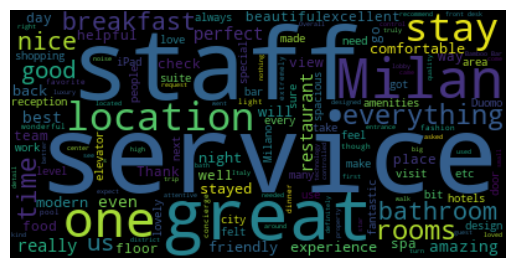

In [30]:
import matplotlib.pyplot as plt
#import nltk
#from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# nltk.download('stopwords')
# Create stopword list:
# stopwords = set(stopwords.words('english'))
stopwords = set(STOPWORDS)
stopwords.update(["armani", "hotel", 'room'])
reviews = " ".join(review for review in file.Review)
wordcloud = WordCloud(stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\ElvisThierrySounnaVo\AppData\Local\Temp\ipykernel_17252\3965179296.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ElvisThierrySounnaVo\AppData\Local\Temp\ipykernel_17252\3965179296.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



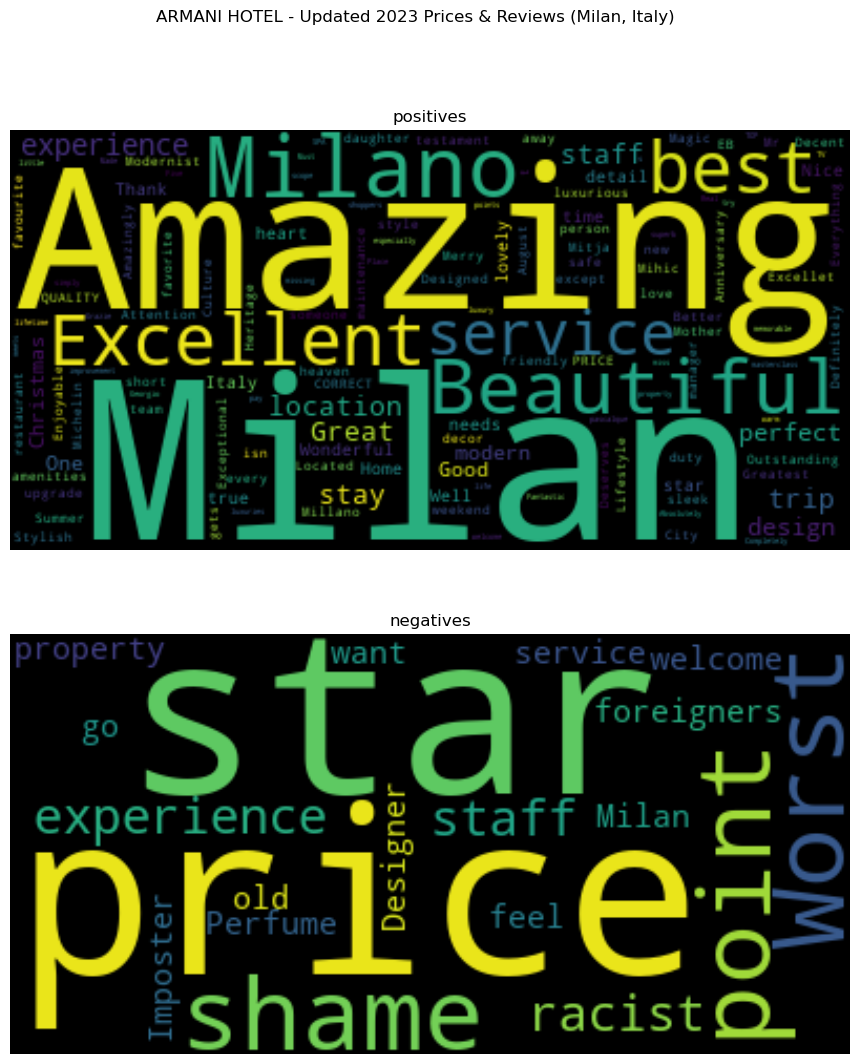

In [31]:
# assign reviews with Rating > 30 as positive sentiment
# Rating < 30 negative sentiment
# remove Rating = 30
df = file[file['Rating'] != 30]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 30 else -1)

# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

pos = " ".join(review for review in positive.Title)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
neg = " ".join(review for review in negative.Title)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)

fig, axes = plt.subplots(2,1, figsize=(12,12))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title('positives')
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title('negatives')
fig.suptitle(browser_title)
fig.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Creare un DataFrame di esempio con le recensioni
data = {'review': ['Questo hotel è fantastico!', 'Non mi è piaciuto per nulla.', 'Ottimo servizio del personale.']}
df = pd.DataFrame(data)

# Assegnare manualmente l'etichetta alle recensioni come positiva o negativa
df['label'] = ['positive', 'negative', 'positive']

# Preprocessare le recensioni: rimuovere stop words, punteggiatura, parole comuni, etc.
stop_words = ['questo', 'per', 'non']
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Dividere il DataFrame in training set e test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Creare una rappresentazione numerica delle recensioni utilizzando TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['review'])
X_test = vectorizer.transform(test_df['review'])

# Addestrare un modello di regressione logistica per la classificazione
model = LogisticRegression()
model.fit(X_train, train_df['label'])

# Funzione per determinare se una parola è associata a recensioni positive o negative
def determine_sentiment(word):
    word_vector = vectorizer.transform([word])
    predicted_label = model.predict(word_vector)[0]
    return predicted_label

# Test con una parola
word = 'servizio'
sentiment = determine_sentiment(word)
print(f'La parola "{word}" è associata a recensioni {sentiment}.')
